In [1]:
library(caret)
library(randomForest)
library(ggplot2)
library(dplyr)
library(corrplot)
library(ROCR)

Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.95 loaded



In [2]:
df <- read.csv("data.csv", header = TRUE, stringsAsFactors = TRUE)
head(df)
str(df)
summary(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


'data.frame':	569 obs. of  33 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se            

       id            diagnosis  radius_mean      texture_mean  
 Min.   :     8670   B:357     Min.   : 6.981   Min.   : 9.71  
 1st Qu.:   869218   M:212     1st Qu.:11.700   1st Qu.:16.17  
 Median :   906024             Median :13.370   Median :18.84  
 Mean   : 30371831             Mean   :14.127   Mean   :19.29  
 3rd Qu.:  8813129             3rd Qu.:15.780   3rd Qu.:21.80  
 Max.   :911320502             Max.   :28.110   Max.   :39.28  
 perimeter_mean     area_mean      smoothness_mean   compactness_mean 
 Min.   : 43.79   Min.   : 143.5   Min.   :0.05263   Min.   :0.01938  
 1st Qu.: 75.17   1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492  
 Median : 86.24   Median : 551.1   Median :0.09587   Median :0.09263  
 Mean   : 91.97   Mean   : 654.9   Mean   :0.09636   Mean   :0.10434  
 3rd Qu.:104.10   3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040  
 Max.   :188.50   Max.   :2501.0   Max.   :0.16340   Max.   :0.34540  
 concavity_mean    concave.points_mean symmetry_mean   

# Codebook: Breast Cancer Wisconsin (Diagnostic) Dataset

| Variable Name | Type | Description |
| :--- | :--- | :--- |
 **ID** | ID | ID Number |
| **diagnosis** | Factor | The diagnosis of the mass (M = Malignant, B = Benign). |
| **radius\_mean** | Float | Mean of distances from center to points on the perimeter. |
| **texture\_mean** | Float | Mean standard deviation of gray-scale values. |
| **perimeter\_mean** | Float | Mean size of the core tumor. |
| **area\_mean** | Float | Mean area of the cell nucleus. |
| **smoothness\_mean** | Float | Mean of local variation in radius lengths. |
| **compactness\_mean** | Float | Mean of perimeter$^2$/area $- 1.0$ (measure of compactness). |
| **concavity\_mean** | Float | Mean severity of concave portions of the contour. |
| **concave\_points\_mean** | Float | Mean number of concave portions of the contour. |
| **symmetry\_mean** | Float | Mean symmetry of the cell nucleus. |
| **fractal\_dimension\_mean** | Float | Mean of "coastline approximation" $- 1$. |
| **radius\_se** | Float | Standard error for mean of distances from center to points on the perimeter. |
| **texture\_se** | Float | Standard error for standard deviation of gray-scale values. |
| **perimeter\_se** | Float | Standard error of the perimeter. |
| **area\_se** | Float | Standard error of the area. |
| **smoothness\_se** | Float | Standard error of local variation in radius lengths. |
| **compactness\_se** | Float | Standard error of compactness |
| **concavity\_se** | Float | Standard error of severity of concave portions of the contour. |
| **concave\_points\_se** | Float | standard error for number of concave portions of the contour. |
| **symmetry\_se** | Float | Standard error of the symmetry. |
| **fractal\_dimension\_se** | Float | Standard error of "coastline approximation" $- 1$. |
| **radius\_worst** | Float | Worst (largest) mean value for radius. |
| **texture\_worst** | Float | Worst (largest) mean value for texture. |
| **perimeter\_worst** | Float | Worst (largest) mean value for perimeter. |
| **area\_worst** | Float | Worst (largest) mean value for area. |
| **smoothness\_worst** | Float | Worst (largest) mean value for smoothness. |
| **compactness\_worst** | Float | Worst (largest) mean value for compactness. |
| **concavity\_worst** | Float | Worst (largest) mean value for concavity. |
| **concave\_points\_worst** | Float | Worst (largest) mean value for concave points. |
| **symmetry\_worst** | Float | Worst (largest) mean value for symmetry. |
| **fractal\_dimension\_worst** | Float | Worst (largest) mean value for fractal dimension. |

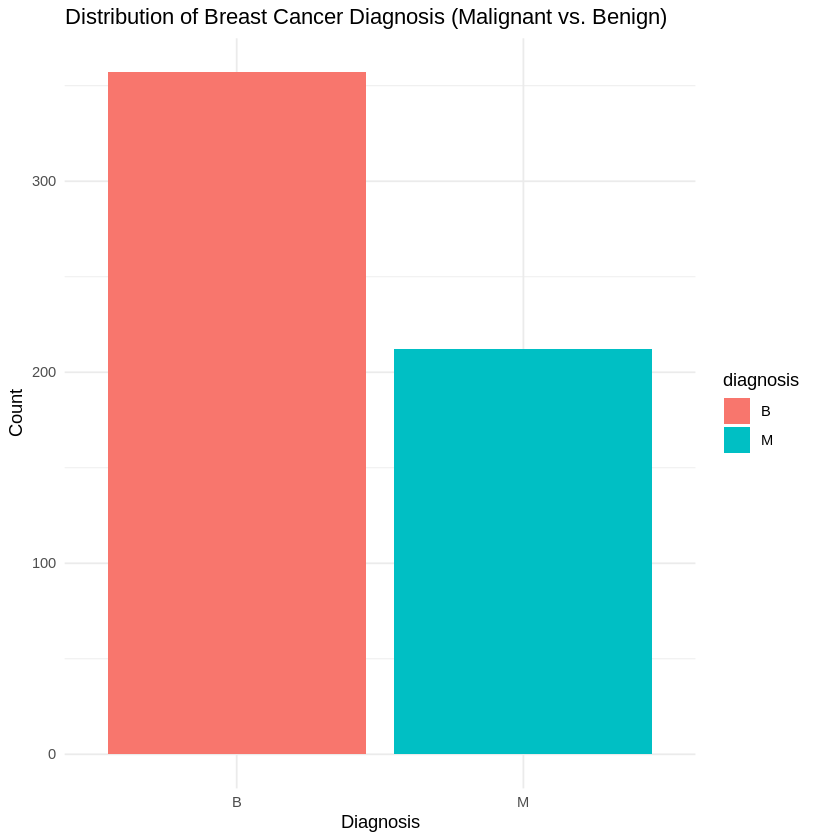

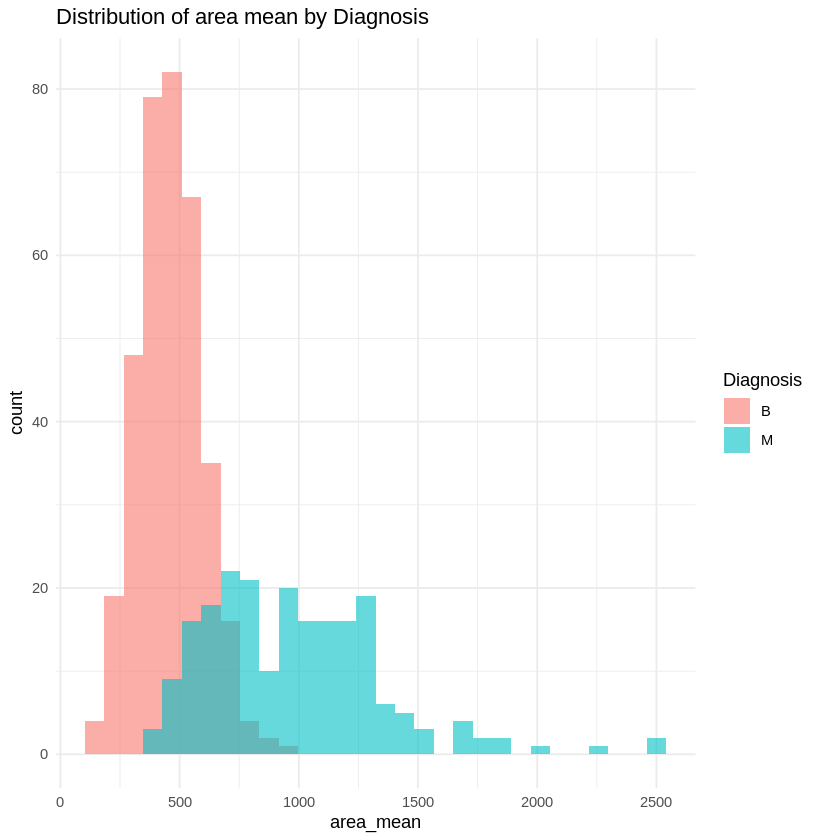

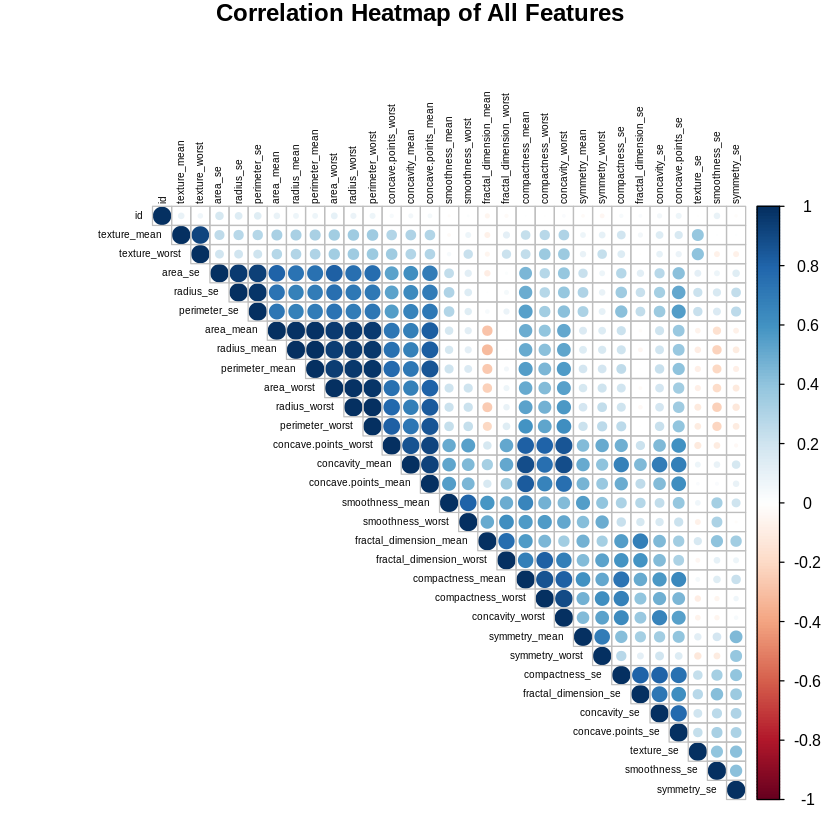

In [3]:
df$diagnosis <- as.factor(df$diagnosis)

# Distribution of Diagnosis
ggplot(df, aes(x = diagnosis, fill = diagnosis)) +
  geom_bar() +
  labs(
    title = "Distribution of Breast Cancer Diagnosis (Malignant vs. Benign)",
    x = "Diagnosis",
    y = "Count"
  ) +
  theme_minimal()

# Histogram of the area_mean Feature across Diagnosis
ggplot(df, aes(x = area_mean, fill = diagnosis)) +
  geom_histogram(alpha=0.6, bins=30, position="identity") +
  labs(
    fill="Diagnosis",
    title="Distribution of area mean by Diagnosis"
  ) +
  theme_minimal()

# Correlation Matrix of Features
cor_matrix_clean <- df %>%
  dplyr::select(where(is.numeric)) %>%
  na.omit() %>%
  cor()
corrplot(
  cor_matrix_clean,
  type = "upper",
  order = "hclust",
  tl.cex = 0.5,
  tl.col = "black",
  title = "Correlation Heatmap of All Features",
  mar = c(0, 0, 1, 0)
)

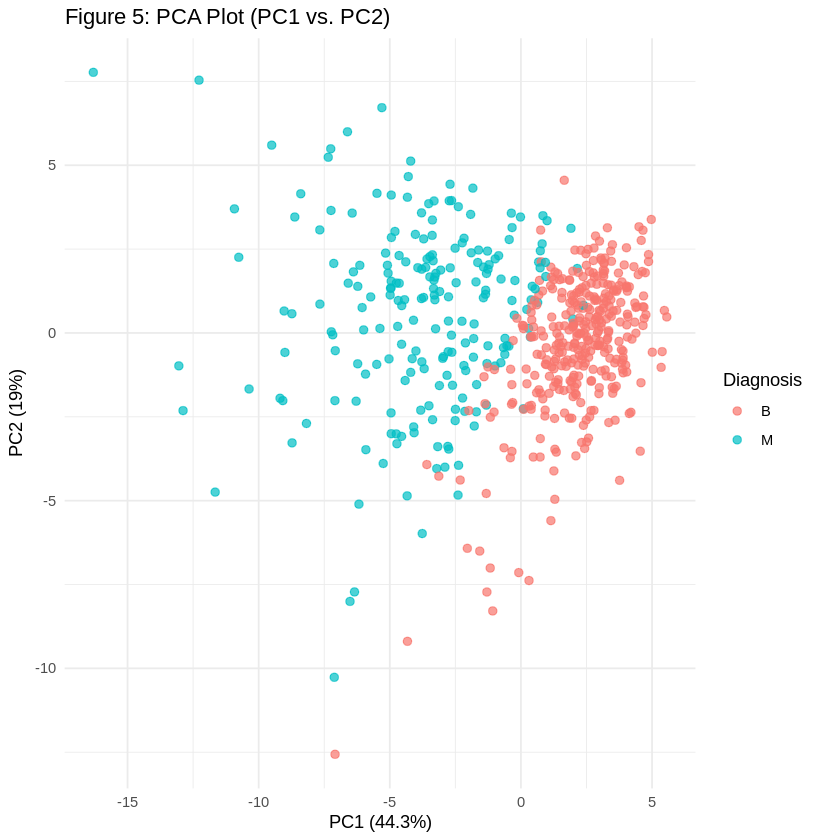

In [4]:
# PCA

pca_result <- df %>%
  select(-c(diagnosis, id, X)) %>%
  select(where(is.numeric)) %>%
  {
    features_df <- .
    nzv <- nearZeroVar(features_df, saveMetrics = TRUE, uniqueCut = 1.0)
    features_df[, nzv$zeroVar == FALSE]
  } %>%
  scale() %>%
  prcomp()

pca_prop_var <- pca_result$sdev^2 / sum(pca_result$sdev^2)
pca_data <- as.data.frame(pca_result$x[, 1:2]) %>%
  mutate(Diagnosis = df$diagnosis)

ggplot(pca_data, aes(x = PC1, y = PC2, color = Diagnosis)) +
  geom_point(alpha = 0.7, size = 2) +
  labs(
    title = "Figure 5: PCA Plot (PC1 vs. PC2)",
    x = paste0("PC1 (", round(pca_prop_var[1] * 100, 1), "%)"),
    y = paste0("PC2 (", round(pca_prop_var[2] * 100, 1), "%)")
  ) +
  theme_minimal()

[1] "Cluster Purity Table (Actual Diagnosis vs. K-Means Cluster):"
   
      1   2
  B 343  14
  M  37 175


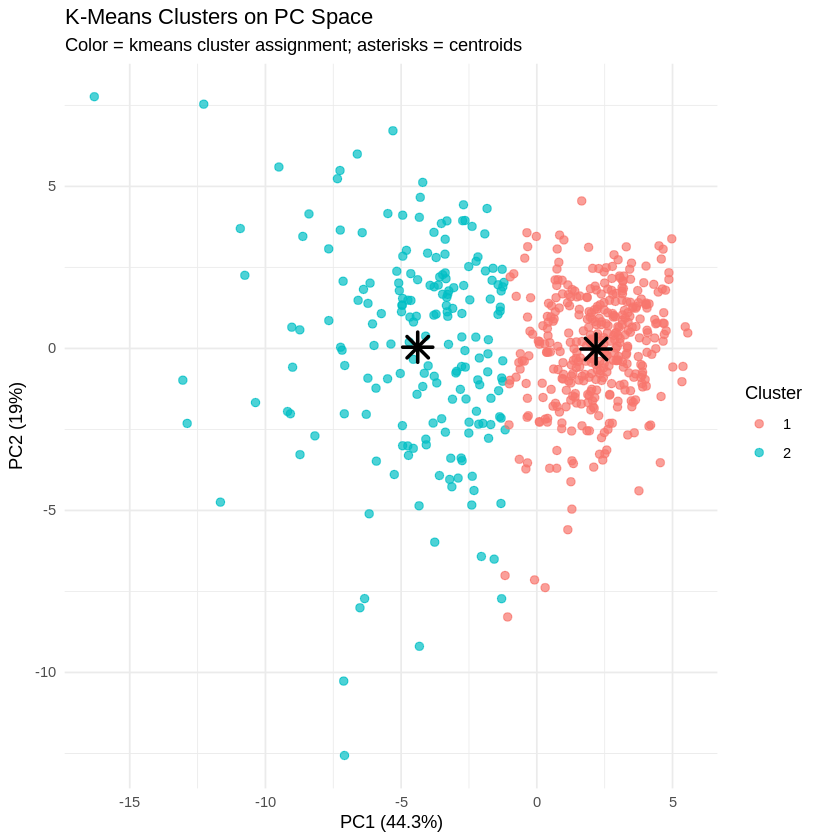

In [5]:
# Kmeans on PC space
df_clean <- subset(df, select = setdiff(names(df), c("id", "X", "cluster")))
df_clean <- na.omit(df_clean)
pca_cum_var <- cumsum(pca_prop_var)
n_components <- which(pca_cum_var >= 0.90)[1]

df_pca_for_clustering <- as.data.frame(pca_result$x[, 1:n_components])
set.seed(123)
k_fit <- kmeans(df_pca_for_clustering, centers = 2, nstart = 25)
df_clean$cluster <- as.factor(k_fit$cluster)

# Cross-tabulate Purity
print("Cluster Purity Table (Actual Diagnosis vs. K-Means Cluster):")
print(table(df_clean$diagnosis, df_clean$cluster))

# --- Plotting Setup ---
# Extract PC1 and PC2 and attach cluster/diagnosis info
pca_data_for_plot <- as.data.frame(pca_result$x[, 1:2]) %>%
  mutate(
    Diagnosis = df_clean$diagnosis,
    Cluster = df_clean$cluster
  )

# Create the separate data frame for the cluster centers (centroids)
centers_df <- as.data.frame(k_fit$centers[, 1:2])
names(centers_df) <- c("PC1", "PC2")

# K-Means Clusters Visualization

ggplot(pca_data_for_plot, aes(x = PC1, y = PC2, color = Cluster)) +
  geom_point(alpha = 0.7, size = 2) +
  geom_point(data = centers_df, aes(x = PC1, y = PC2),
             shape = 8, size = 5, color = "black", stroke = 1.5) +
  labs(
    title = "K-Means Clusters on PC Space",
    subtitle = "Color = kmeans cluster assignment; asterisks = centroids",
    x = paste0("PC1 (", round(pca_prop_var[1] * 100, 1), "%)"),
    y = paste0("PC2 (", round(pca_prop_var[2] * 100, 1), "%)")
  ) +
  theme_minimal()

[1] "Results for 80/20 Train/Test Split"
Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 69  0
         M  2 42
                                          
               Accuracy : 0.9823          
                 95% CI : (0.9375, 0.9978)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9625          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 0.9718          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9545          
             Prevalence : 0.6283          
         Detection Rate : 0.6106          
   Detection Prevalence : 0.6106          
      Balanced Accuracy : 0.9859          
                                          
       'Positive' Class : B           

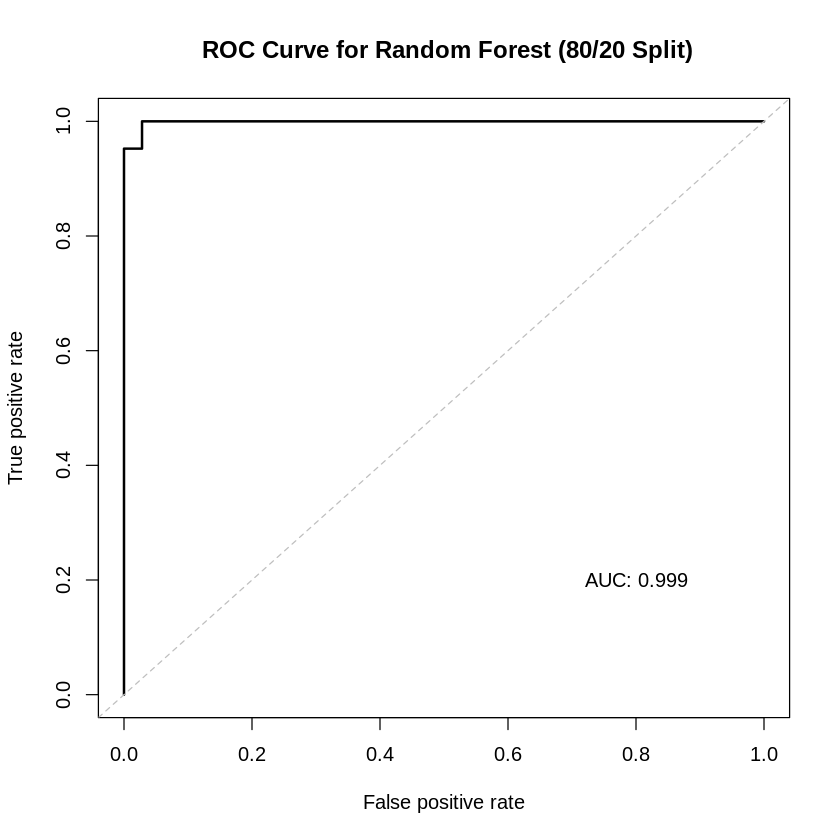

In [6]:
# 80/20 Train/Test Split approach
set.seed(123)
train_index <- createDataPartition(df_clean$diagnosis, p = 0.8, list = FALSE)
train_df <- df_clean[train_index, ]
test_df <- df_clean[-train_index, ]
rf_model_80 <- randomForest(diagnosis ~ ., data = train_df, ntree = 500)
rf_predictions_80 <- predict(rf_model_80, newdata = test_df)
print("Results for 80/20 Train/Test Split")
print(confusionMatrix(rf_predictions_80, test_df$diagnosis))

# 10-fold cross-validation approach
trControl <- trainControl(
    method = "cv",
    number = 10,
    classProbs = TRUE,
    summaryFunction = twoClassSummary
)
set.seed(123)
rf_model_cv <- train(
    diagnosis ~ .,
    data = df_clean,
    method = "rf",
    metric = "ROC",
    trControl = trControl
)
print("Results for 10-Fold Cross-Validation")
print(rf_model_cv$results)

# ROC curve
test_prob <- predict(rf_model_80, newdata = test_df, type = "prob")[, 2]
pred <- prediction(test_prob, test_df$diagnosis)
perf <- performance(pred, "tpr", "fpr")
plot(
  perf,
  lwd = 2,
  main = " ROC Curve for Random Forest (80/20 Split)"
)
abline(a = 0, b = 1, lty = 2, col = "gray")

# AUC
auc <- performance(pred, measure = "auc")
text(x = 0.8, y = 0.2, labels = paste("AUC:", round(auc@y.values[[1]], 3)))

Conclusions:

My research question involves whether these features derived from digitized image of a fine needle aspirate (FNA) of a breast mass are effective classifiers for diagnostic purposes in breast cancer. Our exploratory analysis shows that the number of benigns in our sample is greater, those who are malignant have substantially higher area mean compared to the benign group. Based on the correlation heatmap, certain features are collinear, pointing to the possible utility of dimension reduction.

Through dimensional reduction and k-means clustering, we see that there are clear distinguishing clusters that overlap with the ground truth diagnostic groups (malignant or benign).

I employed a random forest model for classification, using both a 80/20 train/split approach and a cross-validation approach. The results showed that the use of these features were extremely effective in classification of disease outcomes, as shown by our ROC curve and a close to 1 AUC value, with accurate identification of true positives and true negatives.

For our next step, we could obtain the feature importance score from the Random Forest model and see which of these features contribute most importantly to the classification model and potentially useful clinically.